In [12]:

%pip install fake_useragent

import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci_plt
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from pyopt.client import PriceHistory
import os


Note: you may need to restart the kernel to use updated packages.


In [39]:
path_to_csv_files= "K:\Portfolio-Optimization-using-python\Data"

combined_data = pd.DataFrame()

for file in os.listdir(path_to_csv_files):
  if file.endswith('.csv'):
    file_path = os.path.join(path_to_csv_files,file)
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
   
    stock_name = file.split('.')[0]
    df['Stock'] = stock_name  # Add a column for the stock name
    combined_data = pd.concat([combined_data, df])
  

combined_data.dropna(inplace=True)
combined_data.head()




,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2015-03-31,0.555,0.595,0.530,0.565,0.565,4816294.0,A2M
1,2015-04-01,0.575,0.580,0.555,0.565,0.565,4376660.0,A2M
2,2015-04-02,0.560,0.565,0.535,0.555,0.555,2779640.0,A2M
3,2015-04-07,0.545,0.550,0.540,0.545,0.545,392179.0,A2M
4,2015-04-08,0.545,0.545,0.530,0.540,0.540,668446.0,A2M


In [40]:
data = combined_data

In [45]:
pivot_data = combined_data.pivot(index='Date', columns='Stock', values='Close')
print(pivot_data)

Stock             A2M        AGL        ALL      ALQ       ALU   ALX  \
Date                                                                   
2000-01-03        NaN        NaN        NaN      NaN       NaN   NaN   
2000-01-04        NaN   8.349210   5.150000  0.80954   5.35117   NaN   
2000-01-05        NaN   8.244380   4.873750  0.79335   5.01672   NaN   
2000-01-06        NaN   8.117280   4.737500  0.77716   5.07406   NaN   
2000-01-07        NaN   8.330650   4.800000  0.79335   4.96894   NaN   
...               ...        ...        ...      ...       ...   ...   
2020-03-26  16.000000  16.070000  20.450001  5.11000  26.99000  5.27   
2020-03-27  15.870000  15.930000  20.170000  5.39000  26.00000  5.32   
2020-03-30  16.879999  16.980000  21.590000  5.58000  28.02000  5.96   
2020-03-31  16.600000  17.190001  21.350000  5.56000  28.59000  5.51   
2020-04-01  16.820000  17.559999  21.780001  6.15000  28.68000  5.70   

Stock            AMC      AMP        ANN        ANZ  ...    TWE

In [62]:
na = pivot_data.isna().sum().sort_values(ascending = False)

filtered_columns = na[na>1000].index

print(na)




Stock
COL    4816
VEA    4723
APT    4460
WTC    4152
IEL    4060
       ... 
FLT       4
SHL       4
RHC       4
ANZ       4
AMP       0
Length: 100, dtype: int64


In [63]:
pivot_data[filtered_columns]

Stock,COL,VEA,APT,WTC,IEL,S32,A2M,MPL,XRO,VCX,...,AST,CHC,DMP,CWY,SEK,GMG,DXS,MFG,NST,CGF
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,16.549999,1.250,19.410000,13.80,11.56,1.880,16.000000,2.62,67.820000,1.060,...,1.685,6.35,50.240002,1.660,14.50,12.46,9.22,39.720001,11.47,3.92
2020-03-27,15.730000,1.225,19.100000,14.50,11.56,1.770,15.870000,2.66,65.199997,0.965,...,1.705,6.36,50.570000,1.640,13.95,11.13,8.76,38.160000,10.61,3.60
2020-03-30,16.820000,1.270,18.400000,15.85,11.56,1.860,16.879999,2.82,68.000000,0.975,...,1.735,6.58,51.549999,1.740,14.94,11.93,9.00,42.220001,11.40,4.02


In [46]:
df2 = pivot_data.dropna()
print(df2)
print(df2.shape)

Stock             A2M        AGL        ALL   ALQ        ALU      ALX    AMC  \
Date                                                                           
2018-11-21   9.350000  18.500000  25.170000  7.25  21.330000  6.63555  13.36   
2018-11-22   9.900000  18.660000  26.059999  7.27  21.120001  6.63555  13.27   
2018-11-23   9.760000  18.700001  25.930000  7.26  21.260000  6.65524  13.36   
2018-11-26   9.580000  18.520000  25.740000  6.89  21.100000  6.73400  13.49   
2018-11-27   9.750000  18.870001  26.150000  7.08  21.400000  6.82261  13.34   
...               ...        ...        ...   ...        ...      ...    ...   
2020-03-26  16.000000  16.070000  20.450001  5.11  26.990000  5.27000  12.64   
2020-03-27  15.870000  15.930000  20.170000  5.39  26.000000  5.32000  12.54   
2020-03-30  16.879999  16.980000  21.590000  5.58  28.020000  5.96000  13.00   
2020-03-31  16.600000  17.190001  21.350000  5.56  28.590000  5.51000  13.04   
2020-04-01  16.820000  17.559999  21.780

In [69]:
symbols = df2.columns.nunique()

using monte carlo simulation

In [85]:
no_of_portfolios = 3000

log_return = np.log(1+df2.pct_change())

all_weights = np.zeros((no_of_portfolios,symbols))

return_arr = np.zeros(no_of_portfolios)

vol_arr = np.zeros(no_of_portfolios)

sharp_arr = np.zeros(no_of_portfolios)

for i in range(no_of_portfolios):

  weights= np.array(np.random.random(symbols))

  weights = weights/np.sum(weights)

  all_weights[i,:]=weights

  return_arr[i] = np.sum((log_return.mean()*weights)*252)

  vol_arr[i] = np.sqrt(np.dot(weights.T,np.dot(weights,log_return.cov()*252)))

  sharp_arr[i] = (return_arr[i]-0.01)/vol_arr[i]


simulation_data = [return_arr , vol_arr, sharp_arr,all_weights]

simulations = pd.DataFrame(data = simulation_data).T







In [87]:
simulations.columns=['return','volatality' ,'sharp ratio' , 'all weights' ]

In [88]:
simulations

,return,volatality,sharp ratio,all weights
0,-0.050994,0.236672,-0.257716,"[0.012366134812249305, 0.012129406201368766, 0..."
1,-0.093694,0.240699,-0.430805,"[0.02211722076048506, 0.015715973629800456, 0...."
2,-0.056034,0.243899,-0.270743,"[0.008741555121490312, 0.005349893536793129, 0..."
3,-0.104411,0.253152,-0.451946,"[0.019335370169295, 0.015800954981798263, 0.00..."
4,-0.078779,0.244738,-0.362752,"[0.019863767896349336, 0.014135860834701421, 0..."
...,...,...,...,...
2995,-0.084039,0.23796,-0.395189,"[0.012721340312447444, 0.006886340767674337, 0..."
2996,-0.072245,0.238287,-0.345151,"[0.006494541259539652, 0.015357571279697495, 0..."
2997,-0.077048,0.240039,-0.362642,"[0.017187637197088317, 0.009461333179291279, 0..."
2998,-0.101182,0.238619,-0.465939,"[0.01516131548710705, 0.010262366147164886, 0...."


In [89]:
max_sharp_ratio = simulations.loc[simulations['sharp ratio'].idxmax()]
max_sharp_ratio

return                                                 -0.014963
volatality                                              0.235969
sharp ratio                                            -0.105789
all weights    [0.008639759896572136, 0.014915178808818149, 0...
Name: 830, dtype: object

In [90]:
max_sharp_ratio = simulations.loc[simulations['sharp ratio'].idxmin()]
max_sharp_ratio

return                                                 -0.153739
volatality                                              0.248823
sharp ratio                                            -0.658051
all weights    [0.006151115942084835, 0.012719217399434695, 0...
Name: 1830, dtype: object

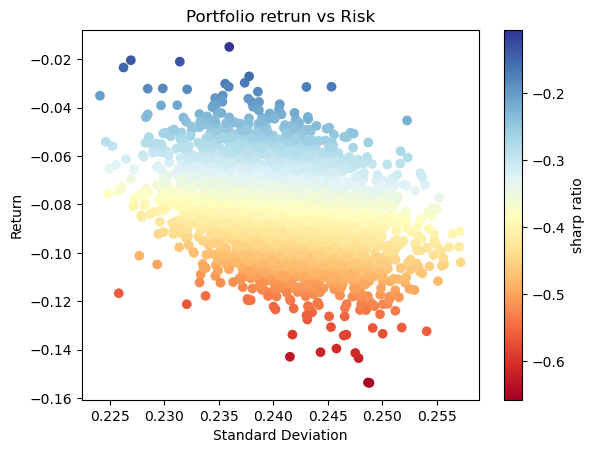

In [93]:
plt.scatter(
  y= simulations['return'],
  x= simulations['volatality'],
  c= simulations['sharp ratio'],
  cmap='RdYlBu'
  )

plt.title("Portfolio retrun vs Risk")

plt.colorbar(label='sharp ratio')

plt.xlabel('Standard Deviation')
plt.ylabel('Return')

plt.show()
